In [1]:
import pandas as pd
import json

# Ingredient-Property

In [2]:
ing_prop = pd.read_excel('ingredient-property.xlsx') 

# convert docids from string to list
ing_prop["docids"] = ing_prop.apply(lambda row: json.loads(row["docids"]), axis=1)
# add column with docids count
ing_prop["docids_count"] = ing_prop.apply(lambda row: len(row["docids"]), axis=1)
print(ing_prop.describe())
ing_prop.head()

             times  docids_count
count  3482.000000   3482.000000
mean      4.957209      4.957209
std      13.783013     13.783013
min       1.000000      1.000000
25%       1.000000      1.000000
50%       2.000000      2.000000
75%       3.000000      3.000000
max     320.000000    320.000000


,ingredient,property,times,docids,docids_count
0,alginate,tensile strength,320,"[6, 13, 14, 16, 19, 20, 21, 28, 29, 30, 38, 42...",320
1,alginate,water vapor,201,"[3, 6, 7, 13, 16, 17, 18, 19, 22, 42, 62, 67, ...",201
2,sodium,tensile strength,196,"[6, 11, 14, 16, 19, 20, 21, 29, 38, 42, 67, 68...",196
3,sodium alginate,tensile strength,182,"[6, 14, 16, 19, 20, 21, 29, 38, 42, 67, 68, 69...",182
4,alginate,thickness,149,"[14, 23, 33, 85, 92, 100, 134, 140, 189, 195, ...",149


### "times" to "docids" ratio

<AxesSubplot:xlabel='times'>

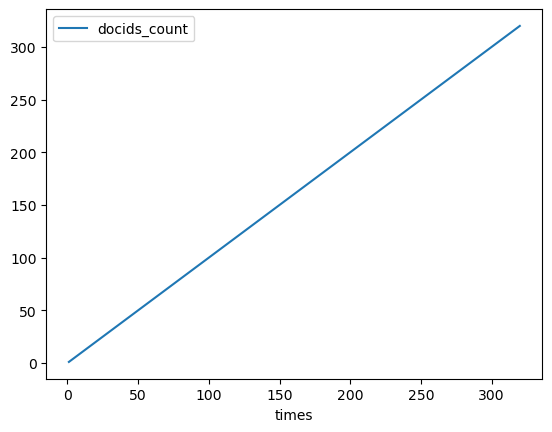

In [3]:
ing_prop.plot(x="times", y="docids_count")

### Plot distribution

<AxesSubplot:ylabel='Density'>

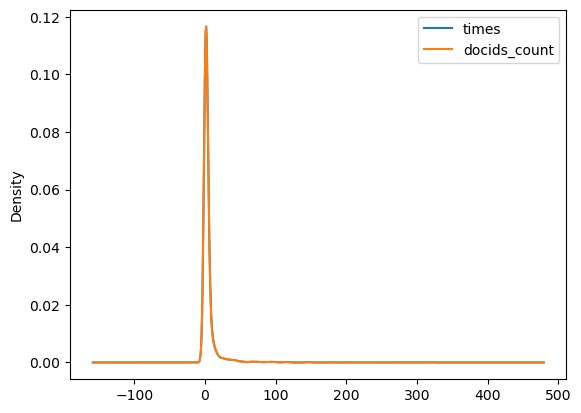

In [4]:
ing_prop.plot(kind='kde')

### Compare ingredient and property names

In [5]:
len(ing_prop["ingredient"].unique())

266

In [6]:
len(ing_prop["property"].unique())

266

### Filter data

Filter rows whose "times" and "docids_count" value are below a threshold

In [7]:
def filter_low_values(df):
    times_thresh = 5
    docids_thresh = 20
    filtered_times = df[df['times'] > times_thresh]
    print("Dropped after times <",times_thresh ,"=", len(df)-len(filtered_times))
    filtered_docids = filtered_times[filtered_times['docids_count'] > docids_thresh]
    print("Dropped after docids_count <",docids_thresh,"=", len(filtered_times)-len(filtered_docids))
    print("Final rows",len(filtered_docids))
    filtered_docids.plot(kind='kde')
    return filtered_docids

Dropped after times < 5 = 2919
Dropped after docids_count < 20 = 410
Final rows 153


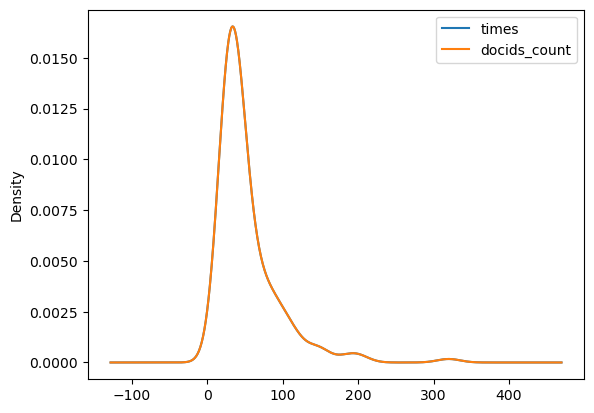

In [8]:
filtered_ing_prop = filter_low_values(ing_prop)

Filter rows whose ingredient names are equal. Since we can't visualize rows like: "alginate" - "alginate"

In [11]:
def filter_repeated_links(df):
    somelist = []
    for index, row in df.iterrows():
        if row["ingredient"] != row["property"]:
            somelist.append(row)
    return pd.DataFrame(somelist)

In [12]:
filtered_no_repeat_ing_prop = filter_repeated_links(filtered_ing_prop)
print("Dropped",len(filtered_ing_prop)- len(filtered_no_repeat_ing_prop), "rows")
print("Final rows:",len(filtered_no_repeat_ing_prop) )
filtered_no_repeat_ing_prop.head()

Dropped 0 rows
Final rows: 153


,ingredient,property,times,docids,docids_count
0,alginate,tensile strength,320,"[6, 13, 14, 16, 19, 20, 21, 28, 29, 30, 38, 42...",320
1,alginate,water vapor,201,"[3, 6, 7, 13, 16, 17, 18, 19, 22, 42, 62, 67, ...",201
2,sodium,tensile strength,196,"[6, 11, 14, 16, 19, 20, 21, 29, 38, 42, 67, 68...",196
3,sodium alginate,tensile strength,182,"[6, 14, 16, 19, 20, 21, 29, 38, 42, 67, 68, 69...",182
4,alginate,thickness,149,"[14, 23, 33, 85, 92, 100, 134, 140, 189, 195, ...",149


### Data export
Export data for d3 force graph visualization

In [23]:
def create_nodes(df):
    # list of all unique nodes in both columns in json format
    ing_list =[]
    unique_ing = df["ingredient"].unique()
    for ingredient in unique_ing:
        ing_dict = {}
        ing_dict["id"] = ingredient
        ing_dict["type"] = "ingredient"
        ing_list.append(ing_dict)
    
    unique_prop = df["property"].unique()
    for prop in unique_prop:
        prop_dict = {}
        prop_dict["id"] = prop
        prop_dict["type"] = "property"
        ing_list.append(prop_dict)
    return ing_list

In [24]:
nodes_list = create_nodes(filtered_no_repeat_ing_prop)

In [25]:
def create_links(df):
    # list all rows
    link_list = []
    for index, row in df.iterrows():
        link_dict = {}
        link_dict["source"] = row["ingredient"]
        link_dict["target"] = row["property"]
        link_dict["force"] = row["times"]
        link_dict["doc_count"] = row["docids_count"]
        link_list.append(link_dict)
    return link_list

In [26]:
links_list = create_links(filtered_no_repeat_ing_prop)

In [27]:
def join_lists(links_list,nodes_list):
    out_dict ={}
    out_dict["nodes"] = nodes_list
    out_dict["links"] = links_list
    return out_dict

In [28]:
links_and_nodes = join_lists(links_list,nodes_list)
links_and_nodes

{'nodes': [{'id': 'alginate', 'type': 'ingredient'},
  {'id': 'sodium', 'type': 'ingredient'},
  {'id': 'sodium alginate', 'type': 'ingredient'},
  {'id': 'agar', 'type': 'ingredient'},
  {'id': 'carrageenan', 'type': 'ingredient'},
  {'id': 'glycerol', 'type': 'ingredient'},
  {'id': 'ftir', 'type': 'ingredient'},
  {'id': 'cellulose', 'type': 'ingredient'},
  {'id': 'fourier transform infrared', 'type': 'ingredient'},
  {'id': 'ph', 'type': 'ingredient'},
  {'id': 'starch', 'type': 'ingredient'},
  {'id': 'scanning electron microscopy', 'type': 'ingredient'},
  {'id': 'chitosan', 'type': 'ingredient'},
  {'id': 'antibacterial', 'type': 'ingredient'},
  {'id': 'antimicrobial', 'type': 'ingredient'},
  {'id': 'calcium', 'type': 'ingredient'},
  {'id': 'tensile strength', 'type': 'ingredient'},
  {'id': 'coli', 'type': 'ingredient'},
  {'id': 'gelatin', 'type': 'ingredient'},
  {'id': 'color', 'type': 'ingredient'},
  {'id': 'gum', 'type': 'ingredient'},
  {'id': 'alcohol', 'type': 'ing

In [20]:
with open('ing_prop.json', 'w') as fp:
    json.dump(links_and_nodes, fp)